# Pendahuluan

### Library yang dibutuhkan

In [1]:
import json
import numpy as np
import pandas as pd
import requests

# Mengakses Data Covid-19 Dari https://covid19-api.org

### Membuat Fungsi get API

Buat fungsi python <b>get_json</b> dengan parameter <b>api_url</b>. fungsi ini akan mengembalikan value berupa python dictionary jika <b>status_code</b> yang dihasilkan adalah 200. Jika tidak, maka value yang dikembalikan adalah <b>None</b>.

In [2]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

### Memanggil API Covid19

Rekapitulasi data COVID-19 global berada di https://covid19-api.org/. Gunakan parameter record_date untuk mengambil data covid19 di seluruh negara pada tanggal tertentu. Untuk kasus ini, gunakan record_date '2020-08-17', dan masukkan hasil respon api ke variable df_covid_worldwide.

Untuk mendapatkan dataframe covid19, gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json() Print sample data covid dengan menggunakan head() function.

In [3]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))

print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


C:\Users\prase\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Merubah Format date

Ubah format kolom 'last_update' menggunakan fungsi to_datetime dengan format <b>YYYY-mm-dd HH:MM:SS</b>. Lalu ubah bentuk datetime ke bentuk date dengan fungsi date() melalui fungsi lambda untuk mengubah setiap row-nya.

In [4]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())

### Mengambil Data Countries

Buatlah dataframe countries dengan memanggil variable countries_url ke api covid19-api.org. Lalu ubah nama kolom alpha2 menjadi country, kemudian ambil hanya kolom name dan country saja untuk dataframe countries (df_countries) ini.

Akhirnya cetaklah lima data teratas dari dataframe countries (df_countries).

In [5]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2': 'country'})[['name','country']]

print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


C:\Users\prase\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


# Kasus Covid-19 di Dunia dan Negara Mana yang Tertinggi

### Merge Covid19 Data dan Countries

Selanjutnya adalah mapping data covid19 dan data country. Gunakan fungsi merge pada pandas untuk menggabungkan df_covid_worldwide dan df_countries. Untuk merge, gunakan kolom country. Lalu print sample data dengan menggunakan head().

In [6]:
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')

print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


### Menghitung Fatality Ratio

Tambahkan satu kolom tambahan yaitu fatality_ratio, yang merupakan pembagian antara kolom deaths dan cases.

In [7]:
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']

### Negara-negara dengan Fatality Ratio Tertinggi

Ambil top 20 negara dengan value kolom fatality_ratio tertinggi dengan menggunakan fungsi sort_values.

In [8]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)

### Import Library Visualisasi

Importlah library matplotlib.pyplot sebagai aliasnya plt.

In [9]:
import matplotlib.pyplot as plt

### Visualisasi Negara dengan Fatality Ratio Tertinggi

Untuk memvisualisasikan negara-negara dengan kasus fatality rate tertinggi akibat covid-19 ini dapat dilakukan dengan menggunakan bar chart.  Di sini tentukan terlebih dahulu isi dari variable x axis dan y axis.

Variabel x axis adalah kolom <b>name</b>, dan kolom y atau value nya adalah kolom <b>fatality_ratio</b> dan gunakan fungsi plt.bar([value x axis, value y axis]).

Label sumbu x diputar 90 derajat untuk menghindari bertumpuknya nama-nama negara pada posisi 0 derajat.

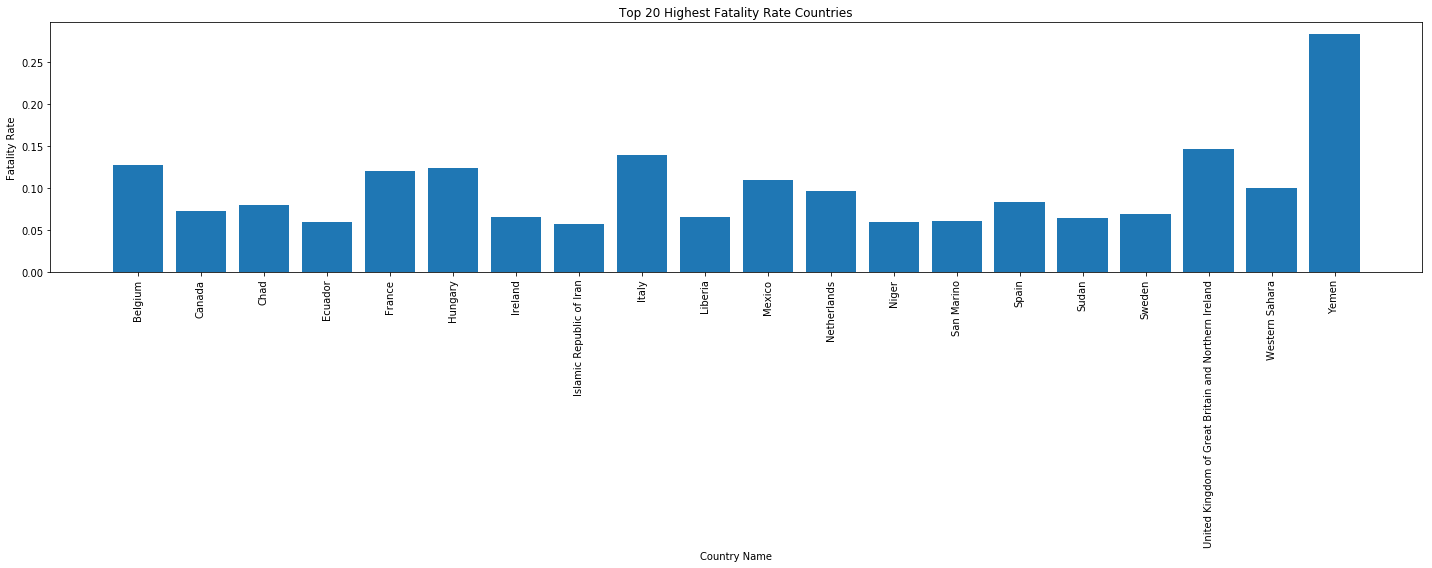

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y)
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Kasus Covid-19 di ASEAN

### Menggabungkan Dataframe

Selanjutnya adalah membandingkan kasus covid19 di Indonesia (ID) dengan negara-negara tetangga, yaitu:

- MY -> Malaysia,
- SG -> Singapure,
- TH -> Thailand,
- VN -> Vietnam.

Untuk itu, api country dipanggil berkali-kali sebanyak negara yang akan kita bandingkan.

Gunakan fungsi pd.io.json.json_normalize dan panggil function yang sudah dibuat sebelumnya, yaitu get_json().

Gunakan fungsi datetime untuk merubah string ke bentuk datetime (YYYY-mm-dd HH:MM:SS) yang selanjutnya diubah ke format date.

Cetaklah lima data teratas dari dataframe yang telah dibentuk.

In [11]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%dT%H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged = df_covid_timeline
    else:
        df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
    i=i+1

print(df_covid_timeline_merged.head())

C:\Users\prase\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


  country last_update  cases  deaths  recovered
0      VN  2020-09-12   1060      35        902
1      VN  2020-09-11   1060      35        902
2      VN  2020-09-10   1059      35        893
3      VN  2020-09-09   1059      35        890
4      VN  2020-09-08   1054      35        868


### Merge Data Covid19 Dengan Data Country

Lalu gabungkan df_covid_timeline_merged dengan df_countries dengan kolom country sebagai pivot.

In [12]:
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on='country')

### Kasus Covid-19 di ASEAN pada Bulan Maret 2020

Filter kolom last_update dari data covid19 sehingga hanya data dari tanggal 1 Maret 2020 ke atas yang diambil. Format datetime.date menggunakan format YYYY, mm, dd.

In [13]:
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.date(2020, 3, 1))]

In [14]:
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-09-12,1060,35,902,Viet Nam
1,VN,2020-09-11,1060,35,902,Viet Nam
2,VN,2020-09-10,1059,35,893,Viet Nam
3,VN,2020-09-09,1059,35,890,Viet Nam
4,VN,2020-09-08,1054,35,868,Viet Nam
...,...,...,...,...,...,...
1048,ID,2020-03-10,27,0,2,Indonesia
1049,ID,2020-03-09,19,0,0,Indonesia
1050,ID,2020-03-08,6,0,0,Indonesia
1051,ID,2020-03-06,4,0,0,Indonesia


### Visualisasi Kasus Covid-19 di ASEAN

Buat variable x dan y dimana x adalah tanggal (last_update) pada tiap-tiap negara dan y adalah jumlah kasus (cases) pada tiap-tiap negara. Lalu plot x dan y untuk menggambar line chart.

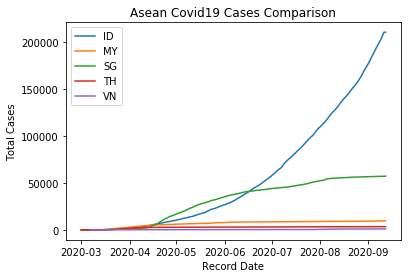

In [14]:
import matplotlib.pyplot as plt
plt.clf()
countries = ['ID','MY','SG','TH','VN']
for country in countries:
    country_data = df_covid_timeline_denormalized['country']==country
    x = df_covid_timeline_denormalized[country_data]['last_update']
    y = df_covid_timeline_denormalized[country_data]['cases']
    plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('Asean Covid19 Cases Comparison')
plt.show()